In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
df.describe(exclude="number")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

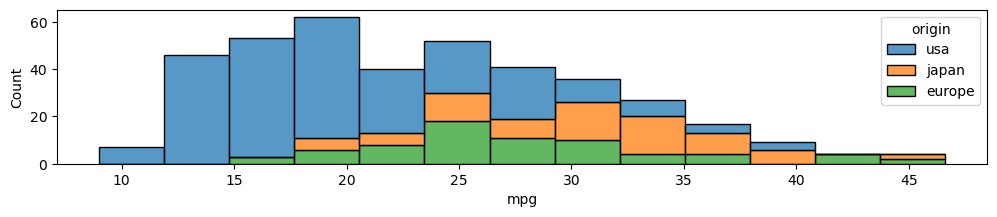

In [21]:
plt.figure(figsize=[12,2])
sns.histplot(df, x='mpg',hue="origin",multiple="stack");

<Figure size 500x500 with 0 Axes>

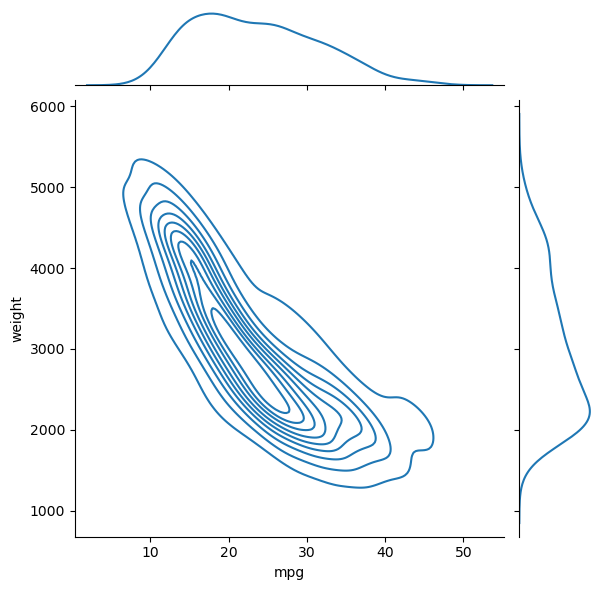

In [31]:
plt.figure(figsize=[5,5])
sns.jointplot(x="mpg",y="weight",data=df,kind="kde")

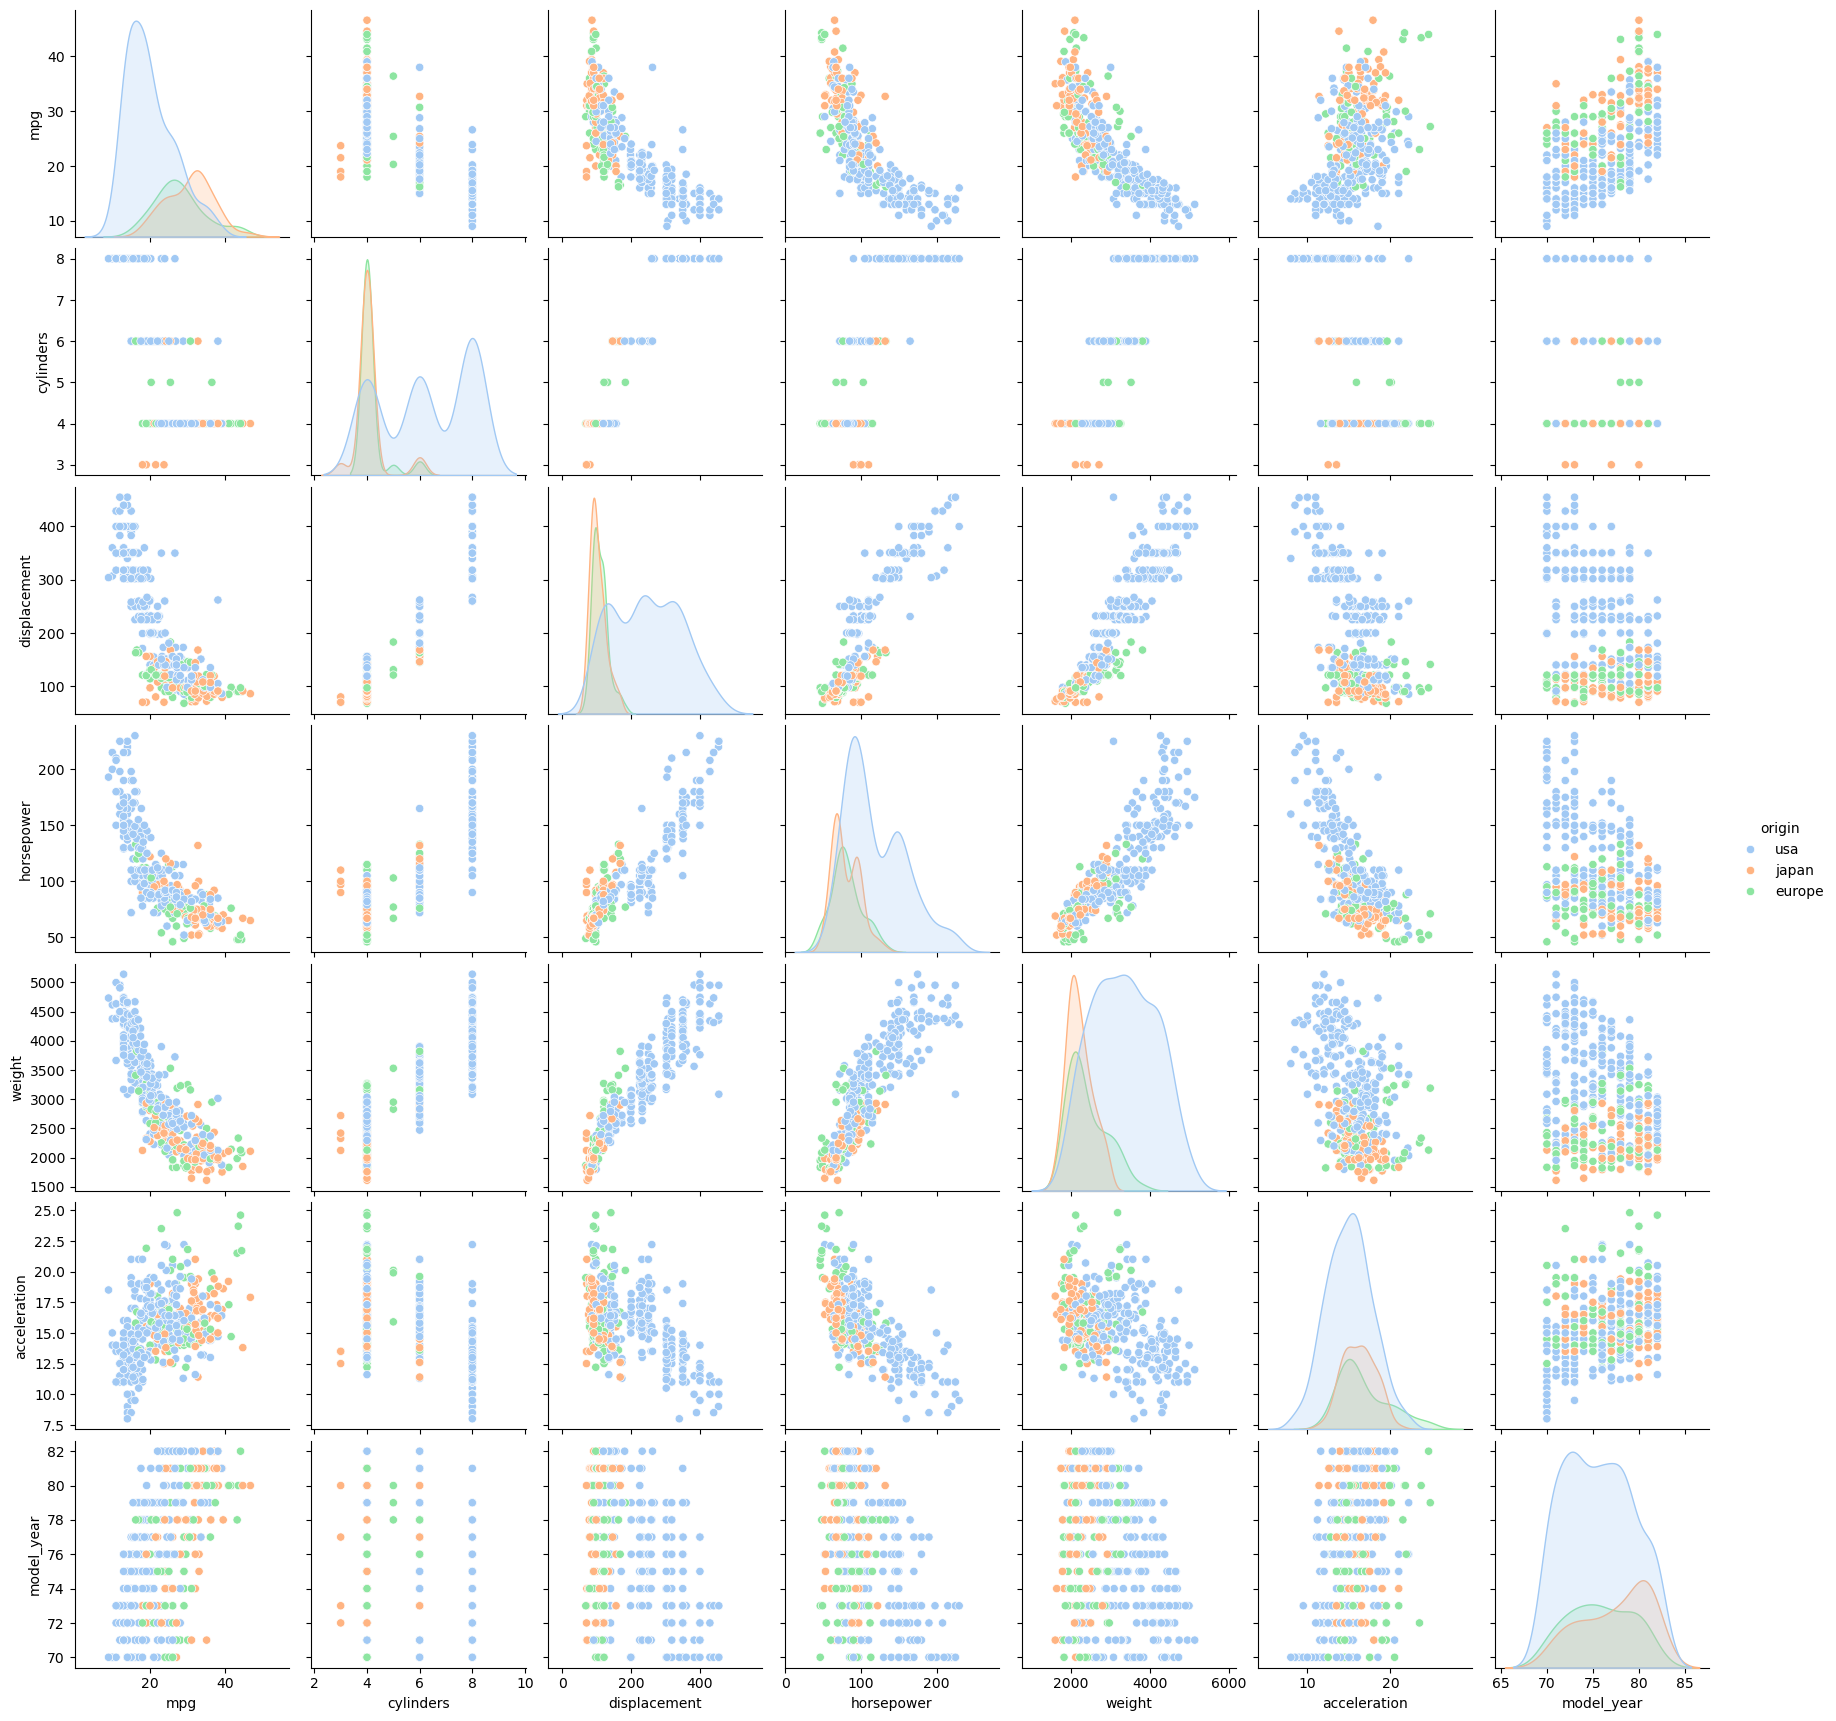

In [37]:
sns.pairplot(df,hue="origin",palette="pastel")

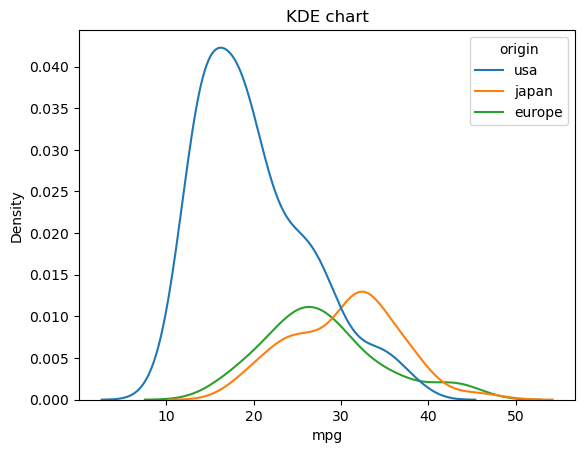

In [39]:
sns.kdeplot(data=df,x='mpg',hue='origin');
plt.title("KDE chart");

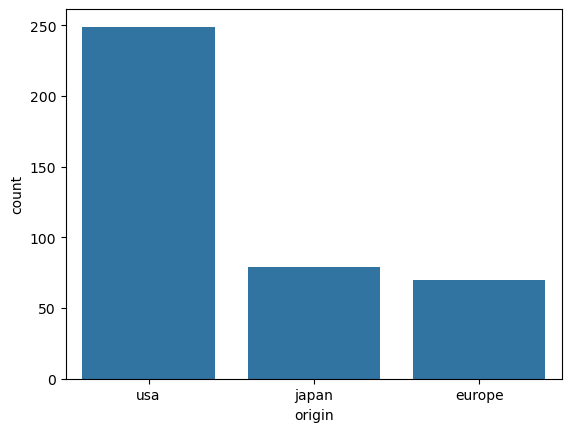

In [43]:
sns.countplot(df,x='origin');

In [52]:
df['clevel'] = df['cylinders'].apply(lambda x: 'bad' if x<5 else 'good' if x > 10 else 'not bad')

In [53]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_level,clevel
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,not bad,not bad
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,not bad,not bad
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,not bad,not bad
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,not bad,not bad
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,not bad,not bad


<Axes: xlabel='model_year', ylabel='count'>

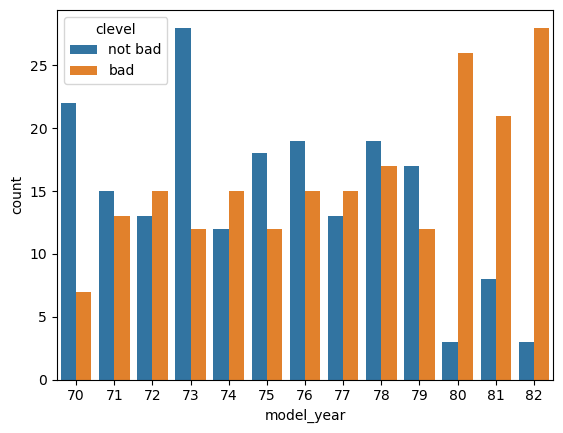

In [54]:
sns.countplot(df,x='model_year',hue="clevel")

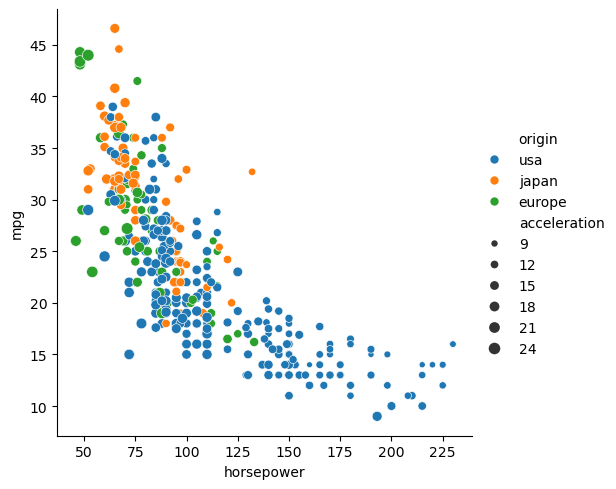

In [61]:
sns.relplot(x="horsepower",y="mpg",hue="origin",size="acceleration",data=df);

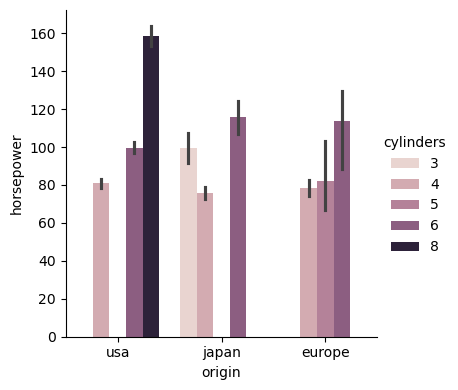

In [63]:
sns.catplot(df,kind='bar',x='origin',y='horsepower',hue='cylinders',height=4);

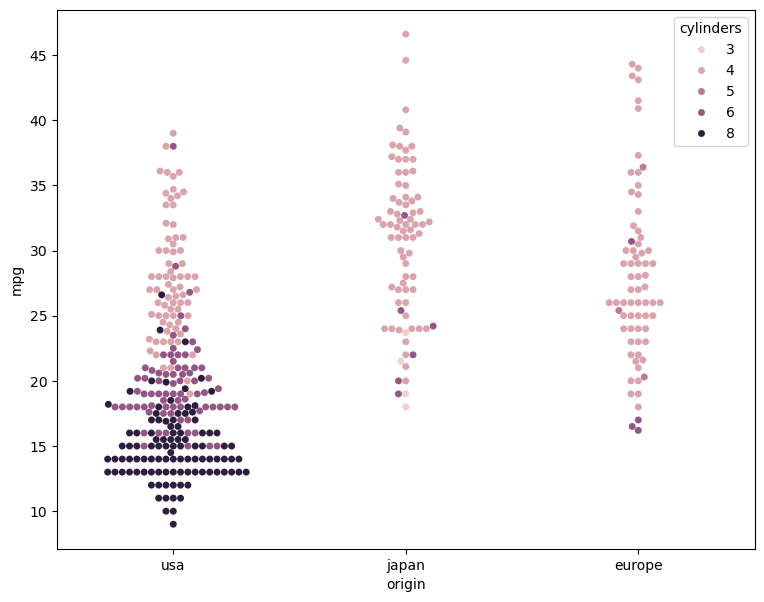

In [70]:
plt.figure(figsize=[9,7]);
sns.swarmplot(x="origin",y="mpg",data=df,hue="cylinders");

In [81]:
df[(df['origin']=='usa') & (df['cylinders']==8) & (df['mpg']>25)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,mpg_level,clevel
364,26.6,8,350.0,105.0,3725,19.0,81,usa,oldsmobile cutlass ls,not bad,not bad


<Axes: ylabel='mpg'>

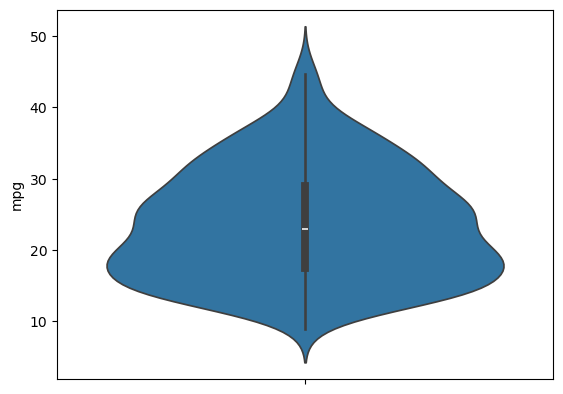

In [89]:
sns.violinplot(data=df['mpg'])

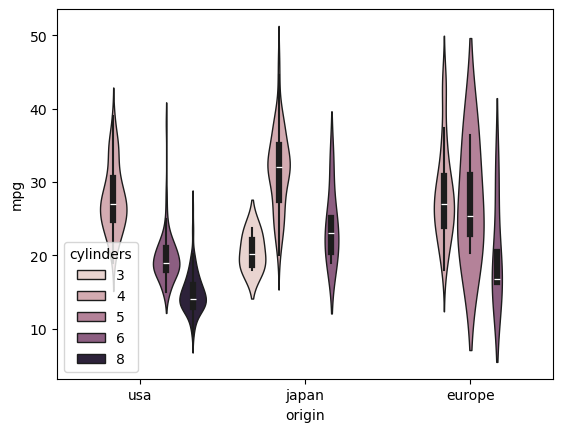

In [90]:
sns.violinplot(x="origin",y="mpg",data=df,hue="cylinders",linewidth=1);